In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('NPS_2017.csv')

In [3]:
df.head()

,ID,Location,Track,Week,Rating (Num),Schedule Pacing
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right
1,36,Los Angeles,Apps,Week 1,4,A little too fast
2,117,San Francisco,Games,Week 1,4,Way too slow
3,253,NaN,NaN,Week 2,4,A little too fast
4,350,New York City,"Apps, Explorer",Week 1,4,Just right


In [4]:
df.sort_values(by='ID', inplace=True)

In [47]:
df.sort_values(by=['Track', 'Location', 'Week'], inplace=True)

In [15]:
df.size

8718

In [95]:
df.dropna(how='any', inplace=True)

In [96]:
df.size

11248

In [50]:
df['Location'].nunique()

12

In [51]:
df['Track'].nunique()

5

In [65]:
df['Week'].nunique()

8

In [67]:
df['WeekNum'] = df['Week'].map( {'Week 1':1, 'Week 2':2, 'Week 3':3, 'Week 4':4, 'Week 5':5, 'Week 6':6, 'Week 7':7, 'Week 8':8} ).astype(int)

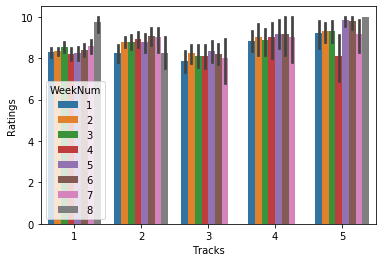

In [100]:
sns.barplot(x='Tracks', y='Ratings', hue='WeekNum', data=df)

In [89]:
df['Tracks'] = df['Track'].map( {'Apps':1, 'Games':2, 'Apps, Explorer':3, 'Games, Explorer':4, 'VR':5} ).astype(int)

In [99]:
df['Ratings'] = df['Rating (Num)'].map( {'1':1, '2':2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9, '10':10, '0':0} ).astype(int)

In [106]:
locs = {}
for ind, loc in enumerate(df['Location'].unique()):
    locs[loc] = ind
print(locs)

{'San Francisco': 0, 'Los Angeles': 1, 'New York City': 2, 'Redwood City': 3, 'Santa Clara': 4, 'Oakland': 5, 'Washington DC': 6, 'Chicago': 7, 'Atlanta': 8, 'Hong Kong': 9, 'Beijing': 10, 'Tokyo': 11}


In [107]:
df['Locations'] = df['Location'].map(locs).astype(int)

In [112]:
pace = {}
for ind, p in enumerate(df['Schedule Pacing'].unique()):
    pace[p] = ind
print(pace)

{'Just right': 0, 'A little too fast': 1, 'Way too slow': 2, 'A little too slow': 3, 'Way too fast': 4}


In [113]:
df['Pace'] = df['Schedule Pacing'].map(pace).astype(int)

In [114]:
df.head()

,ID,Location,Track,Week,Rating (Num),Schedule Pacing,WeekNum,Tracks,Ratings,Locations,Pace
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right,1,3,3,0,0
1,36,Los Angeles,Apps,Week 1,4,A little too fast,1,1,4,1,1
2,117,San Francisco,Games,Week 1,4,Way too slow,1,2,4,0,2
4,350,New York City,"Apps, Explorer",Week 1,4,Just right,1,3,4,2,0
5,23,Redwood City,Apps,Week 1,5,Just right,1,1,5,3,0


In [125]:
df.drop(columns=['Track', 'Week', 'Rating (Num)', 'Schedule Pacing'], inplace=True)
df.head()

,ID,WeekNum,Tracks,Ratings,Locations,Pace
0,134,1,3,3,0,0
1,36,1,1,4,1,1
2,117,1,2,4,0,2
4,350,1,3,4,2,0
5,23,1,1,5,3,0


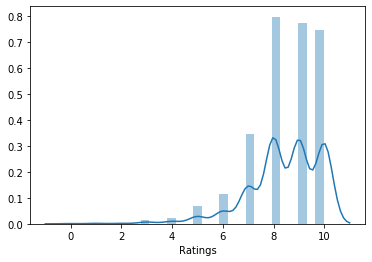

In [129]:
sns.distplot(df['Ratings'])

In [130]:
df.sort_values('Ratings', inplace=True)

In [132]:
df.describe()

,ID,WeekNum,Tracks,Ratings,Locations,Pace
count,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000,1406.000000
mean,754.969417,3.482219,1.729018,8.431010,3.278094,0.467283
std,431.675601,1.950829,1.101198,1.427939,3.269645,0.920311
min,8.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,382.250000,2.000000,1.000000,8.000000,0.000000,0.000000
50%,759.500000,3.000000,1.000000,9.000000,2.000000,0.000000
75%,1122.750000,5.000000,2.000000,10.000000,4.000000,1.000000
max,1499.000000,8.000000,5.000000,10.000000,11.000000,4.000000


In [142]:
npsdf = df.drop(columns=['ID'])

In [137]:
lrdf.head()

,ID,WeekNum,Ratings,Locations
1215,1261,5,0,2
1451,1498,7,1,2
795,833,3,1,2
1117,1160,6,2,0
1311,1357,5,2,2


In [139]:
lrdf.drop(columns='ID', inplace=True)

KeyError: "['ID'] not found in axis"

In [140]:
lrdf.head()

,WeekNum,Ratings,Locations
1215,5,0,2
1451,7,1,2
795,3,1,2
1117,6,2,0
1311,5,2,2


In [148]:
npsdf.head()

,WeekNum,Tracks,Locations,Pace,NPS
1215,5,1,2,1,-1
1451,7,3,2,3,-1
795,3,3,2,4,-1
1117,6,1,0,1,-1
1311,5,1,2,0,-1


In [144]:
# Promoter (9 – 10)
# Passive (7 – 8)
# Detractor (1 – 6)

npsdf['NPS'] = npsdf['Ratings'].map({10:1, 9:1, 8:0, 7:0, 6:-1, 5:-1, 4:-1, 3:-1, 2:-1, 1:-1, 0:-1}).astype(int)

In [147]:
npsdf.drop(columns='Ratings', inplace=True)

In [180]:
df['Locations'].value_counts()

0     360
2     330
4     201
1     106
10     78
7      70
11     65
3      58
6      47
5      47
8      33
9      11
Name: Locations, dtype: int64

In [179]:
npsdf.sort_values('Locations', inplace=True)

In [220]:
# 0     360
# 1     106 466
# 2     330 796
# 3      58 854
# 4     201 1055
# 5      47 1102
# 6      47 1149
# 7      70 1219
# 8      33 1252
# 9      11 1263
# 10     78 1341
# 11     65 1406

l11df = npsdf[1342:1406]

In [190]:
l3df.tail()

,WeekNum,Tracks,Locations,Pace,NPS
774,5,1,3,0,1
78,3,1,3,0,0
784,5,1,3,0,1
332,3,1,3,1,1
62,2,1,3,0,0


In [186]:
l1df.tail()

,WeekNum,Tracks,Locations,Pace,NPS
231,3,1,1,1,0
622,4,1,1,0,1
1297,7,1,1,0,1
1051,6,1,1,0,1
1079,6,2,1,0,1


In [221]:
l11df.head(5)

,WeekNum,Tracks,Locations,Pace,NPS,Ratings
1188,2,1,11,0,0,7
1122,1,1,11,1,0,8
1191,2,1,11,0,0,7
1162,1,1,11,1,1,10
1172,2,1,11,0,1,9


In [205]:
loc_nps = [l0df, l1df, l2df, l3df, l4df, l5df, l6df, l7df, l8df, l9df, l10df, l11df]

In [264]:
for ldf in loc_nps:
    loc = ''
    for l, i in locs.items():
        if i == ldf.loc[:, 'Locations'].iat[4]:
            loc = l
    print((ldf['NPS'].sum()/(ldf['NPS'].count()))*100, loc)

45.27777777777778 San Francisco
59.04761904761905 Los Angeles
37.38601823708207 New York City
43.859649122807014 Redwood City
40.0 Santa Clara
52.17391304347826 Oakland
30.434782608695656 Washington DC
49.275362318840585 Chicago
71.875 Atlanta
-20.0 Hong Kong
67.53246753246754 Beijing
35.9375 Tokyo


In [217]:
npsdf = npsdf.join(df['Ratings'])

In [266]:
npsdf['Pace'].value_counts()

0    1009
1     276
3      97
4      21
2       3
Name: Pace, dtype: int64

In [267]:
npsdf.sort_values('Pace', inplace=True)

In [273]:
# 0    1009
# 1     276 1285
# 2       3 1288
# 3      97 1385
# 4      21 1406

p4df = npsdf[1386:]

In [274]:
p4df.tail()

,WeekNum,Tracks,Locations,Pace,NPS,Ratings
31,1,1,6,4,-1,6
1194,2,1,11,4,0,7
1395,8,2,1,4,0,7
740,1,1,10,4,1,9
642,4,3,0,4,0,8


In [279]:
p_nps = [p0df, p1df, p2df, p3df, p4df]
for pdf in p_nps:
    pa = ''
    for p, i in pace.items():
        if i == pdf.loc[:, 'Pace'].iat[1]:
            pa = p
    print((pdf['NPS'].sum()/(pdf['NPS'].count()))*100, pa)

50.74331020812686 Just right
34.909090909090914 A little too fast
0.0 Way too slow
23.958333333333336 A little too slow
-25.0 Way too fast


In [4]:
sns.barplot(x='Locations', y='Ratings', hue='WeekNum', data=npsdf)

NameError: name 'npsdf' is not defined